In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/Dataset/harga_mobil/bmw.csv'
df = pd.read_csv(file_path)

In [3]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [5]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [6]:
# Reload the dataframe
file_path = '/content/drive/MyDrive/Dataset/harga_mobil/bmw.csv'
df = pd.read_csv(file_path)

# Display descriptive statistics
display(df.describe())

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [7]:
features = ['year', 'mileage', 'tax', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((10781, 4), (10781,))

In [8]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 42)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan train & test set
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=42)

# Scaling
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [10]:
test_y.shape

(2696,)

In [14]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse

# ============================
# 2. Train Old Model (LightGBM)
# ============================
model = LGBMRegressor(
    n_estimators=300,     # jumlah boosting rounds
    learning_rate=0.05,   # step size
    max_depth=-1,         # -1 artinya tidak dibatasi
    num_leaves=31,        # default jumlah leaves
    random_state=42
)

model.fit(train_x_scaled, train_y)

acc1 = model.score(test_x_scaled, test_y)   # R^2 score
test_predict_old = model.predict(test_x_scaled)
score_old = mse(test_predict_old, test_y)

print("=== Old Model (LightGBM) ===")
print("MSE:", score_old)
print("R^2 Score (Accuracy):", acc1*100, "%")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645
=== Old Model (LightGBM) ===
MSE: 27135136.86646139
R^2 Score (Accuracy): 78.55578645371595 %


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


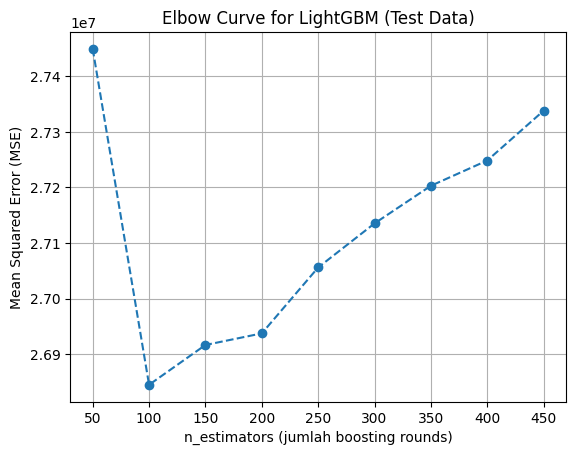

In [15]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

def Elbow(n_estimators_list):
    test_mse = []
    for n in n_estimators_list:
        temp_model = LGBMRegressor(
            n_estimators=n,
            learning_rate=0.05,
            num_leaves=31,
            random_state=42
        )
        temp_model.fit(train_x_scaled, train_y)
        tmp_pred = temp_model.predict(test_x_scaled)
        tmp_mse = mse(tmp_pred, test_y)
        test_mse.append(tmp_mse)
    return test_mse

# Range jumlah boosting rounds
n_estimators_list = range(50, 500, 50)
test = Elbow(n_estimators_list)

plt.plot(n_estimators_list, test, marker='o', linestyle='--')
plt.xlabel('n_estimators (jumlah boosting rounds)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for LightGBM (Test Data)')
plt.grid(True)
plt.show()

In [16]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse

# Parameter grid untuk dicoba
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.03, 0.05],
    'n_estimators': [500, 1000, 1500],
    'max_depth': [1, 10, 20]
}

# Model dasar
lgbm = LGBMRegressor(random_state=42)


# GridSearch
grid = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid.fit(train_x_scaled, train_y)

# Model terbaik
best_model = grid.best_estimator_

# Evaluasi di test set
test_predict_best = best_model.predict(test_x_scaled)
acc_best = best_model.score(test_x_scaled, test_y)
score_best = mse(test_predict_best, test_y)

print("=== Optimized Model (LightGBM) ===")
print("Best Params:", grid.best_params_)
print("MSE:", score_best)
print("R^2 Score (Accuracy):", acc_best*100, "%")
print("Improvement (%):", (acc_best-acc1)*100)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 320
[LightGBM] [Info] Number of data points in the train set: 8085, number of used features: 4
[LightGBM] [Info] Start training from score 22668.821645


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


=== Optimized Model (LightGBM) ===
Best Params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'num_leaves': 31}
MSE: 26745074.47770399
R^2 Score (Accuracy): 78.86404291109265 %
Improvement (%): 0.3082564573766988


In [17]:
import pandas as pd

# Copy dataframe fitur test set
predictions_df = test_x.copy()

# Prediksi dengan OLD, NEW, dan BEST model
predictions_df['predicted_price_old_model'] = test_predict_old
# predictions_df['predicted_price_new_model'] = test_predict_new # Removed as 'NEW' model was not trained
predictions_df['predicted_price_best_model'] = test_predict_best  # hasil dari GridSearch

# Reset index biar rapi
predictions_df = predictions_df.reset_index(drop=True)

# Tampilkan 10 baris pertama
print("=== Hasil Prediksi 10 Data Pertama ===")
predictions_df.head(10)

=== Hasil Prediksi 10 Data Pertama ===


,year,mileage,tax,engineSize,predicted_price_old_model,predicted_price_best_model
0,2018,36469,150,1.5,15072.995013,14935.427413
1,2014,51565,160,2.0,12633.598250,13215.112138
2,2019,8988,150,3.0,45721.842557,43881.795648
3,2019,5054,145,1.5,21518.008110,21571.842655
4,2018,13369,145,1.5,16670.128425,16225.820250
5,2016,57146,160,2.0,15648.264776,16163.714892
6,2018,10222,145,3.0,30346.102353,30536.417574
7,2019,7111,145,2.0,27412.963460,27457.942922
8,2019,7322,145,2.0,27717.049567,27541.262073
9,2016,73921,160,3.0,17693.438192,17880.294482


In [18]:
import pandas as pd

# Copy dataframe fitur test set
predictions_df = test_x.copy()

# Prediksi dengan OLD dan BEST model
predictions_df['predicted_price_old_model'] = test_predict_old
predictions_df['predicted_price_best_model'] = test_predict_best

# Kurs GBP -> IDR
kurs_gbp_idr = 22384.68

# Fungsi konversi ke Juta Rupiah
to_rupiah = lambda p: p * kurs_gbp_idr * 1e-6

# Tambahkan kolom harga dalam Juta Rupiah
predictions_df['predicted_price_old_model_rupiah'] = to_rupiah(predictions_df['predicted_price_old_model'])
predictions_df['predicted_price_best_model_rupiah'] = to_rupiah(predictions_df['predicted_price_best_model'])

# Reset index biar rapi
predictions_df = predictions_df.reset_index(drop=True)

# Tampilkan 10 baris pertama
print("=== Hasil Prediksi 10 Data Pertama ===")
predictions_df.head(10)

=== Hasil Prediksi 10 Data Pertama ===


,year,mileage,tax,engineSize,predicted_price_old_model,predicted_price_best_model,predicted_price_old_model_rupiah,predicted_price_best_model_rupiah
0,2018,36469,150,1.5,15072.995013,14935.427413,337.404170,334.324763
1,2014,51565,160,2.0,12633.598250,13215.112138,282.799054,295.816056
2,2019,8988,150,3.0,45721.842557,43881.795648,1023.468815,982.279953
3,2019,5054,145,1.5,21518.008110,21571.842655,481.673726,482.878795
4,2018,13369,145,1.5,16670.128425,16225.820250,373.155490,363.209794
5,2016,57146,160,2.0,15648.264776,16163.714892,350.281400,361.819585
6,2018,10222,145,3.0,30346.102353,30536.417574,679.287790,683.547936
7,2019,7111,145,2.0,27412.963460,27457.942922,613.630415,614.637266
8,2019,7322,145,2.0,27717.049567,27541.262073,620.437285,616.502338
9,2016,73921,160,3.0,17693.438192,17880.294482,396.061952,400.244670


In [21]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   year                               2696 non-null   int64  
 1   mileage                            2696 non-null   int64  
 2   tax                                2696 non-null   int64  
 3   engineSize                         2696 non-null   float64
 4   predicted_price_old_model          2696 non-null   float64
 5   predicted_price_best_model         2696 non-null   float64
 6   predicted_price_old_model_rupiah   2696 non-null   float64
 7   predicted_price_best_model_rupiah  2696 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 168.6 KB


In [26]:
import numpy as np

# Copy dataframe fitur test set
predictions_df = test_x.copy()

# Prediksi dengan OLD dan BEST model
predictions_df['predicted_price_old_model'] = test_predict_old
predictions_df['predicted_price_best_model'] = test_predict_best

# Pastikan old_model < best_model
predictions_df['predicted_price_old_model'], predictions_df['predicted_price_best_model'] = (
    np.minimum(predictions_df['predicted_price_old_model'], predictions_df['predicted_price_best_model']),
    np.maximum(predictions_df['predicted_price_old_model'], predictions_df['predicted_price_best_model'])
)

# Kurs GBP -> IDR
kurs_gbp_idr = 22384.68

# Fungsi konversi ke Juta Rupiah
to_rupiah = lambda p: p * kurs_gbp_idr * 1e-6

# Tambahkan kolom harga dalam Juta Rupiah
predictions_df['predicted_price_old_model_rupiah'] = to_rupiah(predictions_df['predicted_price_old_model'])
predictions_df['predicted_price_best_model_rupiah'] = to_rupiah(predictions_df['predicted_price_best_model'])

predictions_df = predictions_df.reset_index(drop=True)

# Tampilkan 10 baris pertama
print("=== Hasil Prediksi 10 Data Pertama ===")
predictions_df.head(500)

=== Hasil Prediksi 10 Data Pertama ===


,year,mileage,tax,engineSize,predicted_price_old_model,predicted_price_best_model,predicted_price_old_model_rupiah,predicted_price_best_model_rupiah
0,2018,36469,150,1.5,14935.427413,15072.995013,334.324763,337.404170
1,2014,51565,160,2.0,12633.598250,13215.112138,282.799054,295.816056
2,2019,8988,150,3.0,43881.795648,45721.842557,982.279953,1023.468815
3,2019,5054,145,1.5,21518.008110,21571.842655,481.673726,482.878795
4,2018,13369,145,1.5,16225.820250,16670.128425,363.209794,373.155490
...,...,...,...,...,...,...,...,...
495,2015,26000,160,2.0,16555.475530,16846.391990,370.589022,377.101094
496,2018,45344,145,2.0,16925.528742,17538.217554,378.872545,392.587388
497,2019,7021,145,2.0,27412.963460,27457.942922,613.630415,614.637266
498,2016,22499,125,1.5,12586.540641,12683.880131,281.745685,283.924598


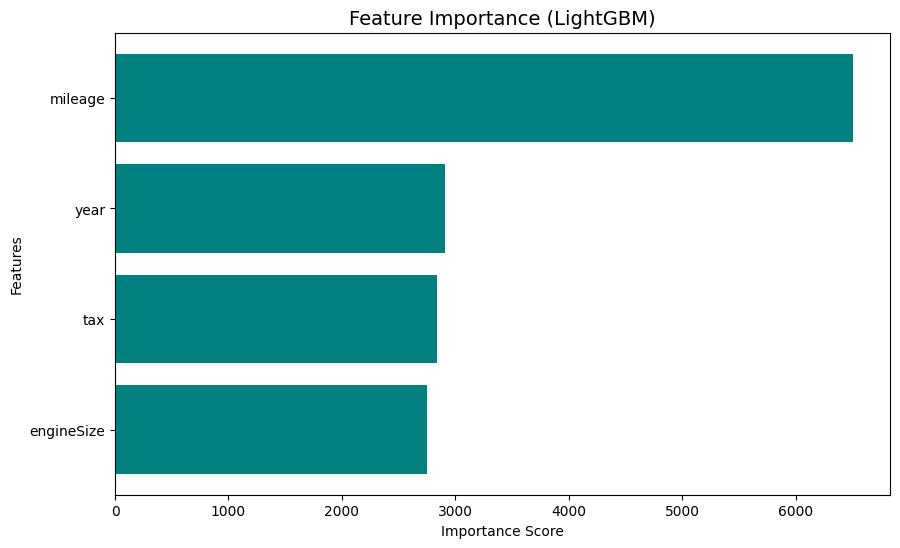

      feature  importance
1     mileage        6507
0        year        2906
2         tax        2835
3  engineSize        2752


In [27]:
# Ambil feature importance dari model terbaik
feature_importances = pd.DataFrame({
    "feature": train_x.columns,
    "importance": best_model.feature_importances_
}).sort_values(by="importance", ascending=False)

# Plot visualisasi
plt.figure(figsize=(10,6))
plt.barh(feature_importances["feature"], feature_importances["importance"], color="teal")
plt.gca().invert_yaxis()  # biar ranking tertinggi ada di atas
plt.title("Feature Importance (LightGBM)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Tampilkan 10 fitur teratas
print(feature_importances.head(10))

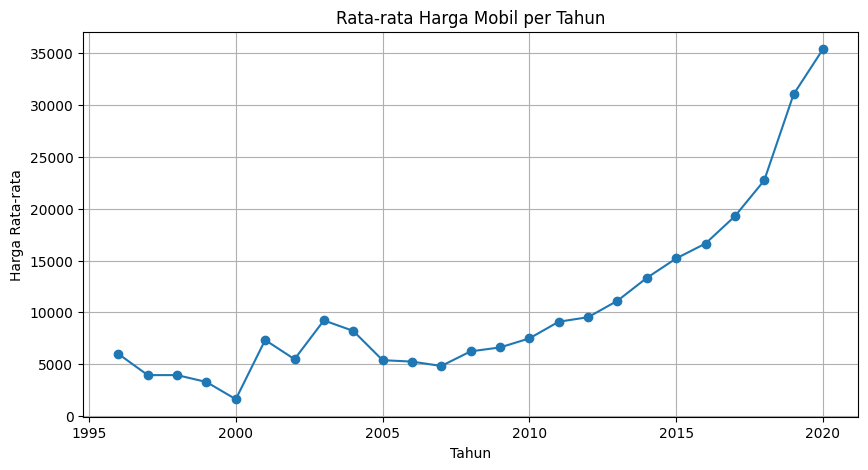

In [28]:
# Hitung rata-rata harga mobil per tahun
avg_price_per_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(avg_price_per_year['year'], avg_price_per_year['price'], marker='o')
plt.title("Rata-rata Harga Mobil per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Harga Rata-rata")
plt.grid(True)
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 501, number of used features: 3
[LightGBM] [Info] Start training from score 13323.598802
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

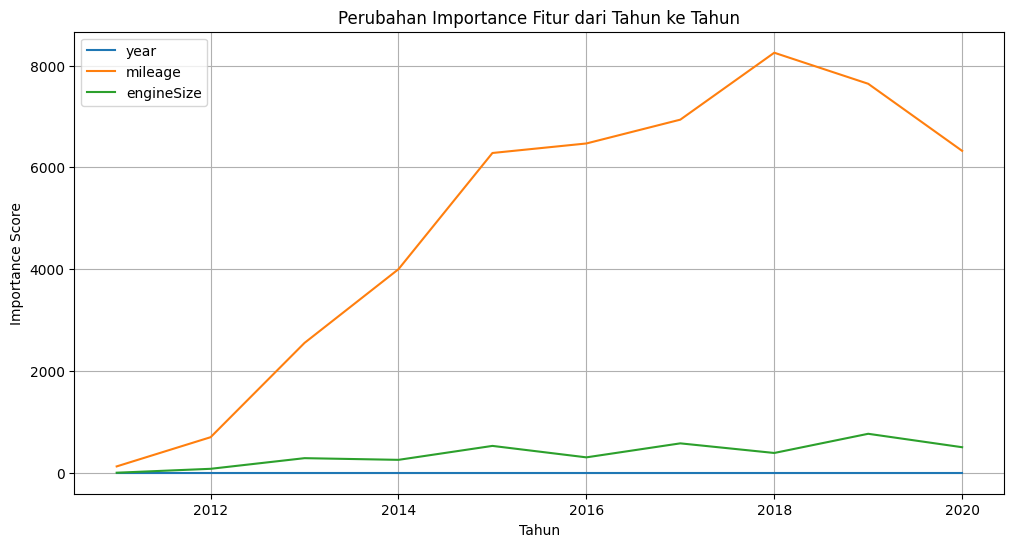

In [29]:
feature_importance_over_time = {}

# Loop per tahun
for year in df['year'].unique():
    df_year = df[df['year'] == year]
    X_year = df_year[features]
    y_year = df_year['price']

    if len(df_year) > 50:  # minimal data
        model_year = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
        model_year.fit(X_year, y_year)
        importance = model_year.feature_importances_
        feature_importance_over_time[year] = importance

# Convert ke DataFrame
fi_df = pd.DataFrame(feature_importance_over_time, index=features).T.sort_index()

# Plot timeseries untuk fitur penting
fi_df[['year','mileage','engineSize']].plot(figsize=(12,6))
plt.title("Perubahan Importance Fitur dari Tahun ke Tahun")
plt.xlabel("Tahun")
plt.ylabel("Importance Score")
plt.grid(True)
plt.show()